In [5]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
import warnings #to remove the warnings
import random
warnings.filterwarnings('ignore')

np.random.seed(100)
random.seed(100)
def generateNewFeatureValMultiple(df, col, numberOfBins, numPatients):
    hist, bins = np.histogram(df[col], bins=numberOfBins)
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(numPatients)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return list(random_from_cdf)   


In [6]:
'''raw_df = pd.read_csv('../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:0,4:1})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
df['BareNuclei'] = df['BareNuclei'].astype(np.int)
print(df.shape)
print(df)'''

cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})




In [10]:
underknnScores = []
undernaiveBaysScores = []
underlogisticRegressionScores = []
undersvmRegressionScores = []
underdecisionTreeRegressionScores = []
for i in range(10):
    X = df[cols[2:]]
    y = df[cols[1]]
    y=y.astype('int')

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T



    trainingSet = X_train.copy()
    trainingSet['Diagnosis'] = y_train
    arr2D = trainingSet.to_numpy()
    columnIndex = -1
    sortedArr = arr2D[arr2D[:,columnIndex].argsort()]
    numZeros = list(sortedArr[:, columnIndex]).count(0)
    benignDF = pd.DataFrame(sortedArr[0:numZeros])
    malignantDF =  pd.DataFrame(sortedArr[numZeros:numZeros+5])
    result = pd.concat([benignDF, malignantDF])
    result.columns = benignDF.columns
    print(benignDF.shape)
    print(malignantDF.shape)
    print(result.shape)
    for j in result:
        result[j] = result[j].astype(np.int)
    X_train = result[result.columns[:-1]]
    y_train = result[result.columns[-1]]

    ''' KNN '''
    
    error = []
    score_vals = []
    for j in range(1, 20):
        knn = KNeighborsRegressor(n_neighbors=j)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        mae = mean_absolute_error(y_test, pred_i)
        error.append(mae)
        score_vals.append(knn.score(X_test, y_test))
        y_pred = knn.predict(X_test)
        y_pred = y_pred == 1
        performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    bestIndex = score_vals.index(max(score_vals)) + 1  #Adds one because it starts with 1 neighbor not 0

    regressor = KNeighborsRegressor(n_neighbors=bestIndex)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred = y_pred == 1
    #print('Iteration {}: '.format(i))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underknnScores.append(performanceAccuracy)

    '''Naive Bayes'''
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = (nb.predict(X_test))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    undernaiveBaysScores.append(performanceAccuracy)

    '''Logistic Regression'''

    modelLogistic = LogisticRegression()
    modelLogistic.fit(X_train,y_train)
    y_pred = modelLogistic.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underlogisticRegressionScores.append(performanceAccuracy)

    '''SVM'''

    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    undersvmRegressionScores.append(performanceAccuracy)
    
    '''Decision Tree'''

    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underdecisionTreeRegressionScores.append(performanceAccuracy)
    print('Iteration: {}'.format(i))




print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(underknnScores), max(underknnScores), sum(underknnScores)/len(underknnScores)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(undernaiveBaysScores), max(undernaiveBaysScores), sum(undernaiveBaysScores)/len(undernaiveBaysScores)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(underlogisticRegressionScores), max(underlogisticRegressionScores), sum(underlogisticRegressionScores)/len(underlogisticRegressionScores)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(undersvmRegressionScores), max(undersvmRegressionScores), sum(undersvmRegressionScores)/len(undersvmRegressionScores)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(underdecisionTreeRegressionScores), max(underdecisionTreeRegressionScores), sum(underdecisionTreeRegressionScores)/len(underdecisionTreeRegressionScores)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


(286, 31)
(5, 31)
(291, 31)
Iteration: 0
(282, 31)
(5, 31)
(287, 31)
Iteration: 1
(282, 31)
(5, 31)
(287, 31)
Iteration: 2
(285, 31)
(5, 31)
(290, 31)
Iteration: 3
(287, 31)
(5, 31)
(292, 31)
Iteration: 4
(287, 31)
(5, 31)
(292, 31)
Iteration: 5
(289, 31)
(5, 31)
(294, 31)
Iteration: 6
(284, 31)
(5, 31)
(289, 31)
Iteration: 7
(282, 31)
(5, 31)
(287, 31)
Iteration: 8
(281, 31)
(5, 31)
(286, 31)
Iteration: 9
KNN - Min: 0.6578947368421053, Max: 0.8947368421052632, Avg: 0.8140350877192983
NB  - Min: 0.34210526315789475, Max: 0.6666666666666666, Avg: 0.531578947368421
LR  - Min: 0.7719298245614035, Max: 0.9473684210526315, Avg: 0.8657894736842104
SVM - Min: 0.8157894736842105, Max: 0.956140350877193, Avg: 0.8991228070175439
DT  - Min: 0.7631578947368421, Max: 0.8859649122807017, Avg: 0.843859649122807


In [11]:
underAugmentedKnnScores = []
underAugmentedNaiveBaysScores = []
underAugmentedLogisticRegressionScores = []
underAugmentedSvmRegressionScores = []
underAugmentedDecisionTreeRegressionScores = []
for i in range(10):
    X = df[cols[2:]]
    y = df[cols[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    #print('X Train: {}'.format(X_train.shape))
    #print('y_train: {}'.format(y_train.shape))
    trainingSet = X_train.copy()
    trainingSet['Diagnosis'] = y_train
    arr2D = trainingSet.to_numpy()
    columnIndex = -1
    sortedArr = arr2D[arr2D[:,columnIndex].argsort()]
    numZeros = list(sortedArr[:, columnIndex]).count(0)
    benignDF, malignantDF = pd.DataFrame(sortedArr[0:numZeros]), pd.DataFrame(sortedArr[numZeros:numZeros+5])
    benignDF.columns = trainingSet.columns
    malignantDF.columns = trainingSet.columns
    benignPatients = []
    print('Benign Shape: {}'.format(benignDF.shape))
    print('Malignant Shape: {}'.format(malignantDF.shape))

    for col in benignDF.columns:
        benignPatients.append(generateNewFeatureValMultiple(benignDF, col, 25, max(benignDF.shape[0], malignantDF.shape[0])))
    beningPatients = np.array(benignPatients).T
    malignangPatients = []
    for col in malignantDF.columns:
        malignangPatients.append(generateNewFeatureValMultiple(malignantDF, col, 25, max(benignDF.shape[0], malignantDF.shape[0])))
    malignangPatients = np.array(malignangPatients).T
    print('Aug Benign Shape: {}'.format(beningPatients.shape))
    print('Aug Malignant Shape: {}'.format(malignangPatients.shape))
    jointArray = np.vstack((beningPatients,malignangPatients))
    finalDataset = pd.DataFrame(jointArray, columns = benignDF.columns)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    print(finalDataset)


    ''' KNN '''

    
    error = []
    score_vals = []
    for j in range(1, 20):
        knn = KNeighborsRegressor(n_neighbors=j)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test).round(decimals=0)
        mae = mean_absolute_error(y_test, pred_i)
        error.append(mae)
        score_vals.append(knn.score(X_test, y_test))
        y_pred = knn.predict(X_test).round(decimals=0)
        y_pred = y_pred == 1
        performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    bestIndex = score_vals.index(max(score_vals)) + 1  #Adds one because it starts with 1 neighbor not 0

    regressor = KNeighborsRegressor(n_neighbors=bestIndex)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test).round(decimals=0)
    y_pred = y_pred == 1
    #print('Iteration {}: '.format(i))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedKnnScores.append(performanceAccuracy)

    '''Naive Bayes'''

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = (nb.predict(X_test))
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedNaiveBaysScores.append(performanceAccuracy)

    '''Logistic Regression'''

    modelLogistic = LogisticRegression()
    modelLogistic.fit(X_train,y_train)
    y_pred = modelLogistic.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedLogisticRegressionScores.append(performanceAccuracy)

    '''SVM'''

    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedSvmRegressionScores.append(performanceAccuracy)
    
    '''Decision Tree'''

    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    performanceAccuracy = sum(y_pred == y_test)/len(y_test)
    underAugmentedDecisionTreeRegressionScores.append(performanceAccuracy)
    print('Iteration: {}'.format(i))




print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedKnnScores), max(underAugmentedKnnScores), sum(underAugmentedKnnScores)/len(underAugmentedKnnScores)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedNaiveBaysScores), max(underAugmentedNaiveBaysScores), sum(underAugmentedNaiveBaysScores)/len(underAugmentedNaiveBaysScores)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedLogisticRegressionScores), max(underAugmentedLogisticRegressionScores), sum(underAugmentedLogisticRegressionScores)/len(underAugmentedLogisticRegressionScores)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedSvmRegressionScores), max(underAugmentedSvmRegressionScores), sum(underAugmentedSvmRegressionScores)/len(underAugmentedSvmRegressionScores)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(underAugmentedDecisionTreeRegressionScores), max(underAugmentedDecisionTreeRegressionScores), sum(underAugmentedDecisionTreeRegressionScores)/len(underAugmentedDecisionTreeRegressionScores)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))


Benign Shape: (286, 31)
Malignant Shape: (5, 31)
Aug Benign Shape: (286, 31)
Aug Malignant Shape: (286, 31)
       radius  texture  perimeter      area  smoothness  compactness  \
0    14.39594  15.0120    73.2584   384.042    0.094723     0.080736   
1    10.73870  16.9400    86.5944   548.382    0.094723     0.129821   
2    10.33234  16.9400    73.2584   384.042    0.090292     0.080736   
3     9.51962  13.0840    70.5912   482.646    0.085861     0.039832   
4    10.73870  11.1560    97.2632   416.910    0.085861     0.064374   
..        ...      ...        ...       ...         ...          ...   
567  17.60920  15.7112   125.5182   617.952    0.087997     0.238844   
568  14.20440  22.9688   125.5182   617.952    0.104912     0.145516   
569  13.23160  16.0136    94.2462  1144.464    0.087997     0.174988   
570  14.20440  19.3400   125.5182   943.888    0.104912     0.174988   
571  17.60920  20.2472    94.2462   542.736    0.138743     0.174988   

     concavity  concave_poi

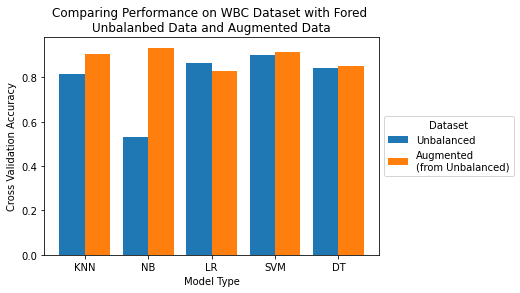

In [13]:
import matplotlib.pyplot as plt 
  
X = ['KNN','NB','LR','SVM', 'DT']

undersampled = [np.mean(underknnScores), np.mean(undernaiveBaysScores), np.mean(underlogisticRegressionScores),
        np.mean(undersvmRegressionScores), np.mean(underdecisionTreeRegressionScores)]
underAug = [np.mean(underAugmentedKnnScores), np.mean(underAugmentedNaiveBaysScores), np.mean(underAugmentedLogisticRegressionScores),
        np.mean(underAugmentedSvmRegressionScores), np.mean(underAugmentedDecisionTreeRegressionScores)]

Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, undersampled, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, underAug, 0.4, label = 'Augmented\n(from Unbalanced)')
  
plt.xticks(X_axis, X)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.title("Comparing Performance on WDBC Dataset with Fored \nUnbalanbed Data and Augmented Data")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()